# Basic Regression with scikit learn

Beispiel Schweizer House Preise von Immoscout 24 vom 28.08.2021.

https://www.immoscout24.ch/de/haus/kaufen/ort-bern?r=30

# Bibliotheken importieren

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Daten einlesen

In [2]:
df = pd.read_json('swiss-houses.json')
df

,id,rooms,livingArea,price,postcode,content
0,6617220,5.5,146.0,895000.0,3422,"5,5 Zimmer, 146 m², CHF 895 000.—Rötimatte 20,..."
1,6646402,4.5,173.0,880000.0,2534,"4,5 Zimmer, 173 m², CHF 880 000.—Les Oeuches 6..."
2,6640757,4.5,120.0,980000.0,3066,"4,5 Zimmer, 120 m², CHF 980 000.—Neunenenstras..."
3,6644387,4.5,140.0,890000.0,3126,"4,5 Zimmer, 140 m², CHF 890 000.—Stutzweg 1, 3..."
4,6641669,4.0,509.0,525000.0,4552,"4 Zimmer, 509 m², CHF 525 000.—Obergadenweg 1,..."
...,...,...,...,...,...,...
451,6633348,NaN,363.0,NaN,2543,"363 m², Preis auf Anfrage2543 Lengnau BE, BE«W..."
452,6515522,5.5,166.0,NaN,1782,"5,5 Zimmer, 166 m², Preis auf Anfrage1782 La C..."
453,6481327,21.0,616.0,NaN,1700,"21 Zimmer, 616 m², Preis auf Anfrage1700 Fribo..."
454,6399232,5.5,206.0,1295000.0,3126,"5,5 Zimmer, 206 m², CHF 1 295 000.—Hauenenstra..."


## Daten filtern

Zeilen rausfiltern die kein Wert haben z.B. bei Preis auf Anfrage oder keine Angabe zu Anzahl Zimmer.

In [3]:
df = df.dropna()
df

,id,rooms,livingArea,price,postcode,content
0,6617220,5.5,146.0,895000.0,3422,"5,5 Zimmer, 146 m², CHF 895 000.—Rötimatte 20,..."
1,6646402,4.5,173.0,880000.0,2534,"4,5 Zimmer, 173 m², CHF 880 000.—Les Oeuches 6..."
2,6640757,4.5,120.0,980000.0,3066,"4,5 Zimmer, 120 m², CHF 980 000.—Neunenenstras..."
3,6644387,4.5,140.0,890000.0,3126,"4,5 Zimmer, 140 m², CHF 890 000.—Stutzweg 1, 3..."
4,6641669,4.0,509.0,525000.0,4552,"4 Zimmer, 509 m², CHF 525 000.—Obergadenweg 1,..."
...,...,...,...,...,...,...
444,6406372,4.5,146.0,920000.0,3634,"4,5 Zimmer, 146 m², CHF 920 000.—Blumensteinst..."
447,6629230,1.5,18.0,39999.0,3232,"1,5 Zimmer, 18 m², CHF 39 999.—Bahnhof, 3232 I..."
449,6541845,5.5,180.0,895000.0,1714,"5,5 Zimmer, 180 m², CHF 895 000.—1714 Heitenri..."
450,6455049,5.5,180.0,2950000.0,3626,"5,5 Zimmer, 180 m², CHF 2 950 000.—3626 Hüniba..."


### Daten formatieren / Feature Engineering

Preis und Wohnfläche in eine Ganzzahl umwandlen

In [4]:
houses = df.copy()
houses['price'] = houses['price'].copy() / 1000
houses = houses.astype({'price': int, 'livingArea': int})
houses

,id,rooms,livingArea,price,postcode,content
0,6617220,5.5,146,895,3422,"5,5 Zimmer, 146 m², CHF 895 000.—Rötimatte 20,..."
1,6646402,4.5,173,880,2534,"4,5 Zimmer, 173 m², CHF 880 000.—Les Oeuches 6..."
2,6640757,4.5,120,980,3066,"4,5 Zimmer, 120 m², CHF 980 000.—Neunenenstras..."
3,6644387,4.5,140,890,3126,"4,5 Zimmer, 140 m², CHF 890 000.—Stutzweg 1, 3..."
4,6641669,4.0,509,525,4552,"4 Zimmer, 509 m², CHF 525 000.—Obergadenweg 1,..."
...,...,...,...,...,...,...
444,6406372,4.5,146,920,3634,"4,5 Zimmer, 146 m², CHF 920 000.—Blumensteinst..."
447,6629230,1.5,18,39,3232,"1,5 Zimmer, 18 m², CHF 39 999.—Bahnhof, 3232 I..."
449,6541845,5.5,180,895,1714,"5,5 Zimmer, 180 m², CHF 895 000.—1714 Heitenri..."
450,6455049,5.5,180,2950,3626,"5,5 Zimmer, 180 m², CHF 2 950 000.—3626 Hüniba..."


## Daten Analyse

Statistische Zusammenfassung (AVG / Min / Max) Preis.

In [5]:
houses['price'].describe()

count     383.000000
mean     1180.328982
std       589.992001
min        39.000000
25%       799.000000
50%       990.000000
75%      1355.000000
max      4000.000000
Name: price, dtype: float64

Statistische Zusammenfassung (AVG / Min / Max) - Wohnfläche

In [6]:
houses['livingArea'].describe()

count     383.000000
mean      227.234987
std       246.064803
min        18.000000
25%       140.000000
50%       168.000000
75%       221.500000
max      3248.000000
Name: livingArea, dtype: float64

Alle Häuser mit mehr als 2000 m^2 Wohnfläche

In [7]:
houses[houses['livingArea'] > 2000]

,id,rooms,livingArea,price,postcode,content
298,6392704,13.0,3248,1850,3248,"13 Zimmer, 3248 m², CHF 1 850 000.—Bernstrasse..."
301,6003067,8.0,2190,830,2190,"8 Zimmer, 2190 m², CHF 830 000.—Oelegasse 39 u..."


### Häuser mit mehr als 500 m^2 Wohnfläche rausfiltern

In [8]:
houses = houses[houses["livingArea"] < 500]
houses

,id,rooms,livingArea,price,postcode,content
0,6617220,5.5,146,895,3422,"5,5 Zimmer, 146 m², CHF 895 000.—Rötimatte 20,..."
1,6646402,4.5,173,880,2534,"4,5 Zimmer, 173 m², CHF 880 000.—Les Oeuches 6..."
2,6640757,4.5,120,980,3066,"4,5 Zimmer, 120 m², CHF 980 000.—Neunenenstras..."
3,6644387,4.5,140,890,3126,"4,5 Zimmer, 140 m², CHF 890 000.—Stutzweg 1, 3..."
5,6640443,9.0,190,830,3425,"9 Zimmer, 190 m², CHF 830 000.—Solothurnstrass..."
...,...,...,...,...,...,...
444,6406372,4.5,146,920,3634,"4,5 Zimmer, 146 m², CHF 920 000.—Blumensteinst..."
447,6629230,1.5,18,39,3232,"1,5 Zimmer, 18 m², CHF 39 999.—Bahnhof, 3232 I..."
449,6541845,5.5,180,895,1714,"5,5 Zimmer, 180 m², CHF 895 000.—1714 Heitenri..."
450,6455049,5.5,180,2950,3626,"5,5 Zimmer, 180 m², CHF 2 950 000.—3626 Hüniba..."


### Preisanalyse

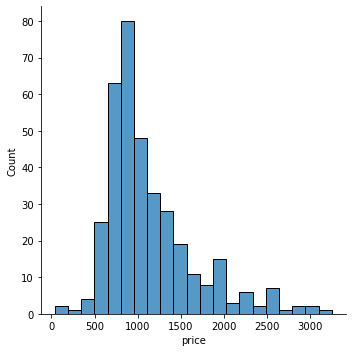

In [9]:
# Histogram
sns.displot(houses['price']);

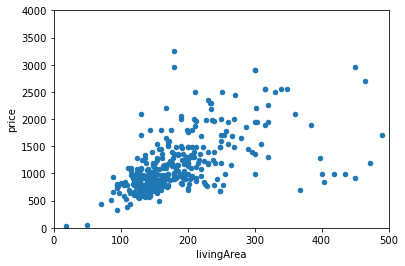

In [10]:
# Scatter Plot livingArea/price
data = pd.concat([houses['price'], houses['livingArea']], axis=1)
data.plot.scatter(x='livingArea', y='price', ylim=(0,4000), xlim=(0,500));

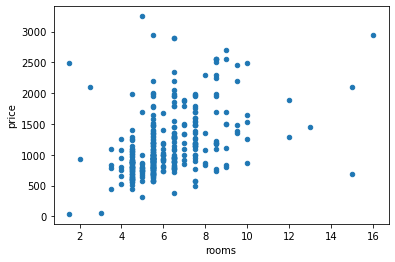

In [11]:
#scatter plot rooms/price
data = pd.concat([houses['price'], houses['rooms']], axis=1)
data.plot.scatter(x='rooms', y='price');

# Modell tranieren

## Daten aufteilen in Trainings- und Testmenge

Das Aufteilen der Daten geschieht mit einer Hilfsfunktion von scikit learn. Die Aufteilung geschieht zufällig, um aber das Resultat reproduzierbar zu machen wird (mit `random_state=1`) steht dieselbe Zufallsauswahl gewählt.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(houses['livingArea'].to_numpy().reshape(-1, 1), houses['price'], test_size=0.5, random_state=1)

### Modell tranieren

In [13]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

### Modell evaluieren

In [14]:
# Score
# Score
from sklearn.metrics import mean_absolute_error

print('Mean absolute error (training) {:.3f}', mean_absolute_error(y_train, linreg.predict(X_train)))
print('Mean absolute error (test) {:.3f}', mean_absolute_error(y_test, linreg.predict(X_test)))

print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Mean absolute error (training) {:.3f} 308.51332162351
Mean absolute error (test) {:.3f} 295.16476744409584
R-squared score (training): 0.244
R-squared score (test): 0.393


#### R-squared score

Wert zwischen 0 und 1.

<img src="./image-rsquared.png" alt="rsqaured" />

### Modell Graphisch evaluieren

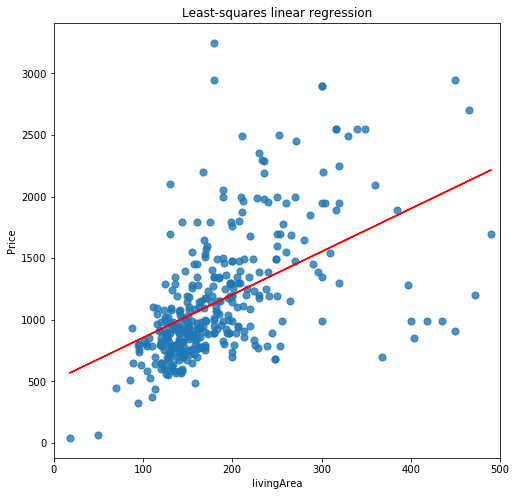

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(houses['livingArea'].to_numpy(), houses['price'].to_numpy(), marker= 'o', s=50, alpha=0.8)
plt.plot(houses['livingArea'].to_numpy(), linreg.coef_ * houses['livingArea'].to_numpy() + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('livingArea')
plt.ylabel('Price')
plt.xlim([0,500])
plt.show()

### Modell mit 2 Features (Wohnfläche und Anzahl Zimmer) tranieren

In [16]:
X_train, X_test, y_train, y_test = train_test_split(houses[['livingArea', 'rooms']], houses['price'], test_size=0.5, random_state=1)

In [17]:
X_train

,livingArea,rooms
84,185,7.5
243,130,4.5
334,196,5.5
429,300,9.5
438,165,5.5
...,...,...
238,157,6.5
307,140,5.5
90,250,7.5
280,130,5.5


In [18]:
linreg = LinearRegression().fit(X_train, y_train)

In [19]:
from sklearn.metrics import mean_squared_error

# Score
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

R-squared score (training): 0.266
R-squared score (test): 0.412
